# Short-coding Project 1: Watermark
## Usage
Simply replace the paths assigned to 'wmk' and 'im' with the paths to the desired watermark and image to be watermarked, and choose the position of the watermark by changing the x and y value. Finally, choose the transparency factor t (0 is opaque, 1 is fully transparent (invisible) ).

## Specifications
The watermark to be printed on the image is supposed to be a black and white image. 
Is is also supposed that the portion of it to be applied is the white one (if that's not the case, simply invert the watermark at the input with 'np.invert(wmk)'). I could not make that automatic because the code will never know if the watermark is (with the ULB logo for example) actually the logo or the contour of it.

## How it works ?
The analyzeLighting function returns the mean value of the pixels of the image in the rectangle where the watermark will be placed. This way, the addWatermark function will invert the watermark if it is asked to be placed on a light region of the image. This inversion can be forced not to happen by declaring the "forced" flag to 1.

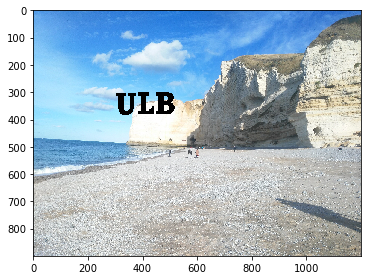

In [72]:
import numpy as np 
from skimage.io import imread, imshow, imsave

wmk = imread("watermark.png")
im = imread("etretat.jpg")

x = 300 # Between 0 and np.size(im,1)-np.size(wmk,1)
y = 300 # Same with size(., 0)

t = 0 # Between 0 and 1


def addWatermark(image, wmk, xplace, yplace, transparency=0, forced=0):
    if xplace+np.size(wmk,1) > np.size(image,1) or yplace+np.size(wmk,0) > np.size(image,0):
        print("Error: watermark out of image borders")
        return -1
    watermark = wmk
    if analyzeLighting(image,xplace,yplace,[np.size(watermark,0),np.size(watermark,1)]) > 110 and forced==0 :
        watermark = np.invert(watermark)
        lod = 0
    else:
        lod = 255
    newimage = image
    for ypix in range(np.size(wmk,0)):
        for xpix in range(np.size(watermark,1)):
            if watermark[ypix,xpix]==lod:
                newimage[yplace+ypix,xplace+xpix]=transparency*image[yplace+ypix,xplace+xpix]+(1-transparency)*watermark[ypix,xpix]
    return newimage             

def analyzeLighting(image,xstart,ystart,size):
    cropped = image[xstart:xstart+size[0],ystart:ystart+size[1]]
    return cropped.mean()
        

watermarked = addWatermark(im,wmk,x,y,t)
imsave("Watermarked.png",watermarked)
imshow(watermarked)